In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d 

In [4]:
image = cv2.imread("../data/test_image.jpg", cv2.IMREAD_GRAYSCALE)

### Adds different types of noise (Uniform, Gaussian, and Salt & Pepper)

In [ ]:
# uniform noise
def add_uniform_noise(img, intensity=50):
    noise = np.random.uniform(-intensity, intensity, img.shape).astype(np.uint8)
    return cv2.add(img, noise)

# Gaussian noise
def add_gaussian_noise(img, mean=0, std=25):
    noise = np.random.normal(mean, std, img.shape).astype(np.uint8)
    return cv2.add(img, noise)

# salt & pepper noise
def add_salt_pepper_noise(img, salt_prob=0.02, pepper_prob=0.02):
    noisy_img = np.copy(img)
    total_pixels = img.size
    num_salt = int(total_pixels * salt_prob)
    num_pepper = int(total_pixels * pepper_prob)
    
    # Salt noise
    coords = [np.random.randint(0, i - 1, num_salt) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 255
    
    # Pepper noise
    coords = [np.random.randint(0, i - 1, num_pepper) for i in img.shape]
    noisy_img[coords[0], coords[1]] = 0
    
    return noisy_img

In [6]:
uniform_noisy = add_uniform_noise(image)
gaussian_noisy = add_gaussian_noise(image)
salt_pepper_noisy = add_salt_pepper_noise(image)

### Apply built in filters

In [ ]:
def apply_filters(img):
    avg_filtered = cv2.blur(img, (5, 5)) 
    gaussian_filtered = cv2.GaussianBlur(img, (5, 5), 0) 
    median_filtered = cv2.medianBlur(img, 5)  
    return avg_filtered, gaussian_filtered, median_filtered


### Apply implemented filters

In [36]:
def apply_average_filter(img, kernel_size=3):
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size ** 2)
    return convolve2d(img, kernel).astype(np.uint8)

def gaussian_kernel(size, sigma=1.0):
    ax = np.linspace(-(size // 2), size // 2, size)
    gauss = np.exp(-0.5 * np.square(ax) / np.square(sigma))
    kernel = np.outer(gauss, gauss)
    return kernel / np.sum(kernel)

def apply_gaussian_filter(img, kernel_size=3, sigma=1.0):
    kernel = gaussian_kernel(kernel_size, sigma)
    return convolve2d(img, kernel).astype(np.uint8)

def apply_median_filter(img, kernel_size=3):
    pad = kernel_size // 2
    img_padded = np.pad(img, pad, mode='edge')  
    output = np.zeros_like(img, dtype=np.uint8)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            region = img_padded[i:i+kernel_size, j:j+kernel_size]
            output[i, j] = np.median(region)

    return output

def apply_filters(img):
    filtered_avg = apply_average_filter(img)
    filtered_gauss = apply_gaussian_filter(img)
    filtered_median = apply_median_filter(img)
    return filtered_avg, filtered_gauss, filtered_median

In [37]:
filtered_uniform = apply_filters(uniform_noisy)
filtered_gaussian = apply_filters(gaussian_noisy)
filtered_salt_pepper = apply_filters(salt_pepper_noisy)

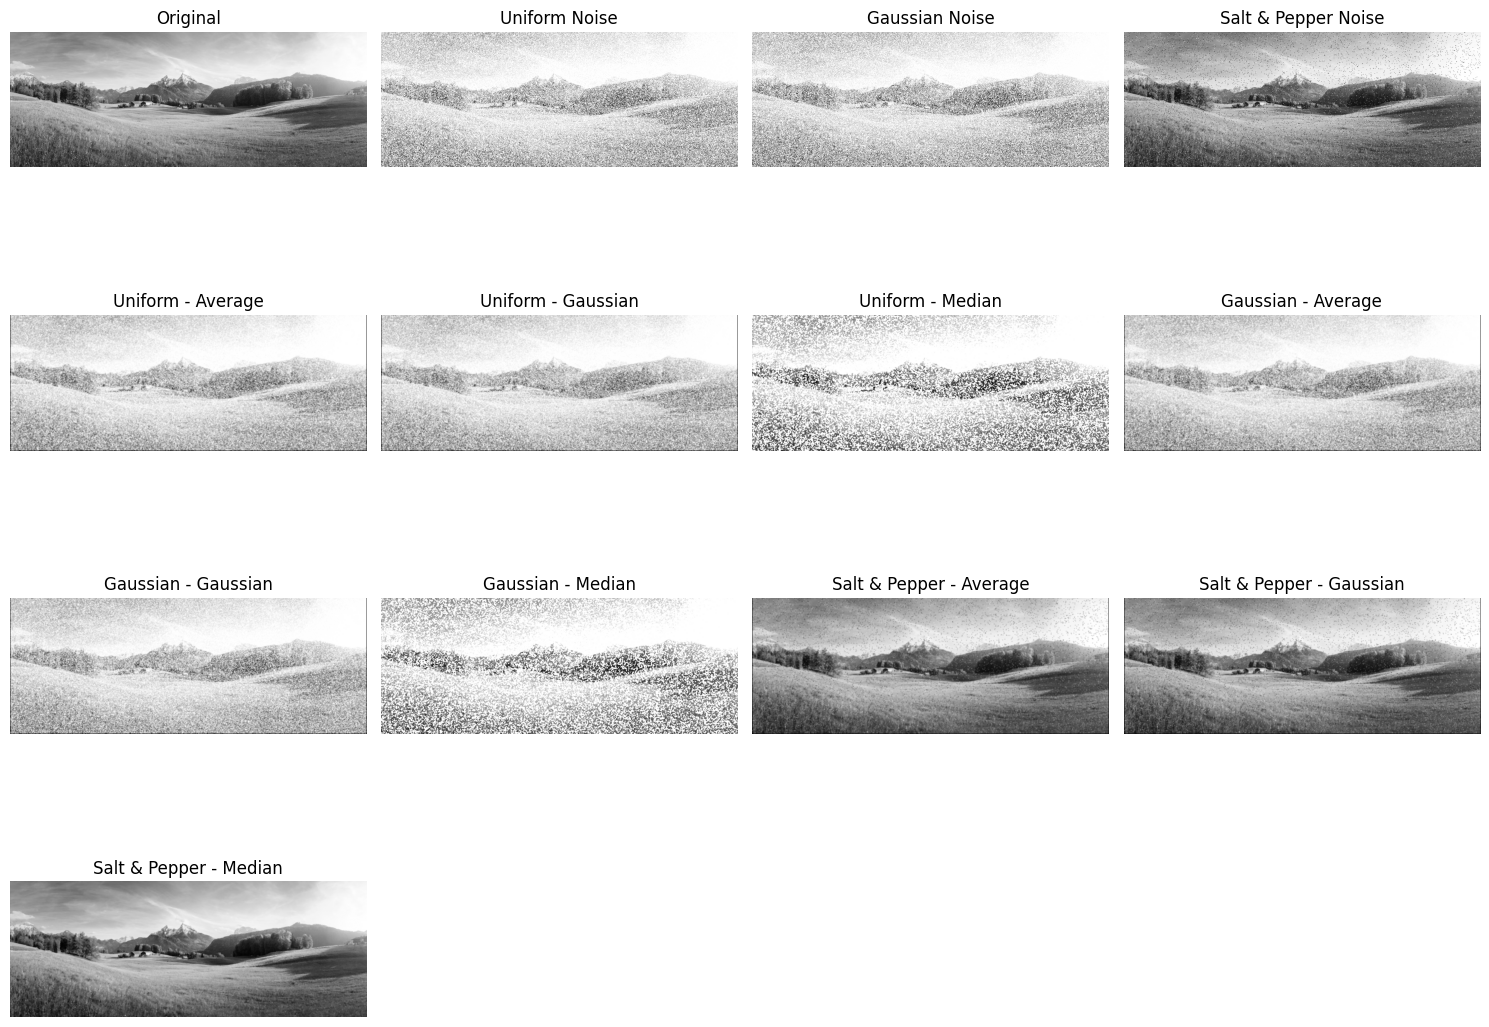

In [38]:
def show_images(images, titles):
    plt.figure(figsize=(15, 12))  
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(4, 4, i + 1) 
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis("off")
    plt.tight_layout() 
    plt.show()

show_images(
    [image, uniform_noisy, gaussian_noisy, salt_pepper_noisy,
     filtered_uniform[0], filtered_uniform[1], filtered_uniform[2],
     filtered_gaussian[0], filtered_gaussian[1], filtered_gaussian[2],
     filtered_salt_pepper[0], filtered_salt_pepper[1], filtered_salt_pepper[2]],
    ["Original", "Uniform Noise", "Gaussian Noise", "Salt & Pepper Noise",
     "Uniform - Average", "Uniform - Gaussian", "Uniform - Median",
     "Gaussian - Average", "Gaussian - Gaussian", "Gaussian - Median",
     "Salt & Pepper - Average", "Salt & Pepper - Gaussian", "Salt & Pepper - Median"]
)